In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import pickle

In [32]:
df = pd.read_csv('dataset.csv',encoding='latin')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [33]:
df.shape

(10000, 12)

In [34]:
df.drop(columns=['customer_id'],inplace=True)
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [36]:
df.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [37]:
df.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [38]:
df.isna().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [39]:
df.duplicated().sum()

0

In [40]:
churn0_count, churn1_count = df['churn'].value_counts()
print(churn0_count,churn1_count)

7963 2037


<Axes: xlabel='churn'>

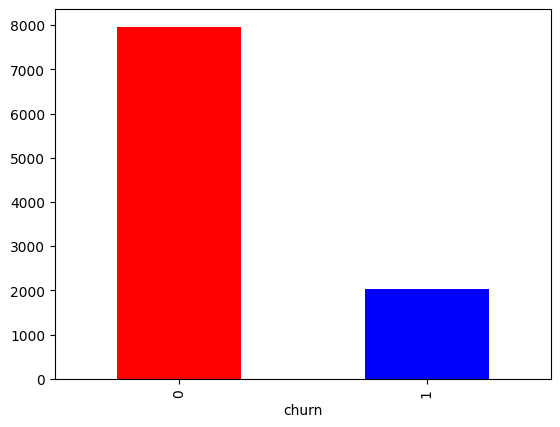

In [41]:
df['churn'].value_counts().plot(kind='bar',color=['red','blue'])

In [42]:
df_churn0 = df[df['churn'] == 0]
df_churn1 = df[df['churn'] == 1]

In [43]:
df_churn1_new = df_churn1.sample(churn0_count,replace=True)
balanced_df = pd.concat([df_churn0,df_churn1_new])
balanced_df.shape

(15926, 11)

<Axes: xlabel='churn'>

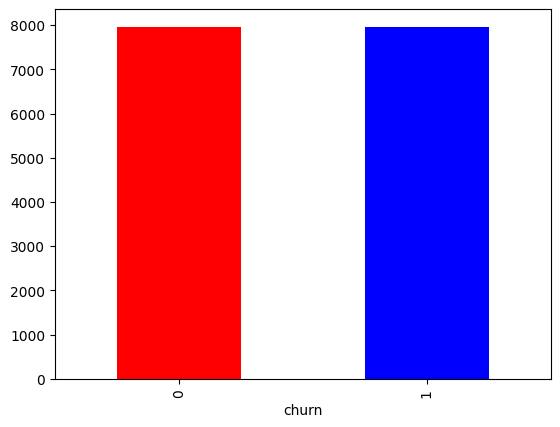

In [44]:
balanced_df['churn'].value_counts().plot(kind='bar',color=['red','blue'])

In [45]:
balanced_df['country'].value_counts()

country
France     7410
Germany    4831
Spain      3685
Name: count, dtype: int64

In [46]:
balanced_df['gender'].value_counts()

gender
Male      8109
Female    7817
Name: count, dtype: int64

In [47]:
Le_gender = LabelEncoder()
Le_country = LabelEncoder()
balanced_df['gender'] = Le_gender.fit_transform(balanced_df.gender.values)
balanced_df['country'] = Le_country.fit_transform(balanced_df.country.values)

In [48]:
balanced_df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
6,822,0,1,50,7,0.00,2,1,1,10062.80,0
8,501,0,1,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...
1182,673,0,0,43,5,168069.73,1,1,1,146992.24,1
3170,850,1,0,35,2,80931.75,1,0,0,12639.67,1
4643,597,0,0,60,0,131778.08,1,0,0,10703.53,1
245,635,0,0,40,10,123497.58,1,1,0,131953.23,1


In [49]:
corr = balanced_df.corr()
corr.style.background_gradient(cmap='cool')

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
credit_score,1.000000,0.008722,-0.003310,-0.016504,0.009315,0.000676,0.000581,-0.003424,0.027222,-0.010472,-0.048384
country,0.008722,1.000000,0.003864,0.015263,-0.019802,0.080033,0.008340,-0.008020,-0.003608,-0.003303,0.043495
gender,-0.003310,0.003864,1.000000,-0.036784,0.011542,0.007717,-0.035076,-0.000264,0.023061,-0.014041,-0.126732
age,-0.016504,0.015263,-0.036784,1.000000,-0.017895,0.041502,-0.031810,-0.013583,0.018036,-0.000190,0.346483
tenure,0.009315,-0.019802,0.011542,-0.017895,1.000000,0.004075,0.019072,0.021581,-0.019530,0.017095,-0.015988
balance,0.000676,0.080033,0.007717,0.041502,0.004075,1.000000,-0.181789,-0.009433,-0.029449,0.007028,0.143172
products_number,0.000581,0.008340,-0.035076,-0.031810,0.019072,-0.181789,1.000000,0.005149,0.036792,0.015967,-0.044139
credit_card,-0.003424,-0.008020,-0.000264,-0.013583,0.021581,-0.009433,0.005149,1.000000,-0.037555,-0.018735,0.003178
active_member,0.027222,-0.003608,0.023061,0.018036,-0.019530,-0.029449,0.036792,-0.037555,1.000000,-0.007875,-0.198187
estimated_salary,-0.010472,-0.003303,-0.014041,-0.000190,0.017095,0.007028,0.015967,-0.018735,-0.007875,1.000000,0.008903


In [50]:
X = balanced_df.iloc[:,:10]
Y = balanced_df.iloc[:,-1]

In [51]:
X.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
1,608,2,0,41,1,83807.86,1,0,1,112542.58
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
6,822,0,1,50,7,0.00,2,1,1,10062.80
8,501,0,1,44,4,142051.07,2,0,1,74940.50


In [52]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [53]:
X_scaled

array([[-0.39966688,  1.54001985, -1.01850601, ..., -1.559355  ,
         1.09254927,  0.21379914],
       [ 0.53008546, -0.95617435, -1.01850601, ..., -1.559355  ,
        -0.91529053, -0.11172574],
       [ 2.07286132,  1.54001985, -1.01850601, ...,  0.64129079,
         1.09254927, -0.36814128],
       ...,
       [-0.51205452, -0.95617435, -1.01850601, ..., -1.559355  ,
        -0.91529053, -1.55747855],
       [-0.1238063 , -0.95617435, -1.01850601, ...,  0.64129079,
        -0.91529053,  0.55140687],
       [ 1.90938838, -0.95617435,  0.98183024, ...,  0.64129079,
        -0.91529053, -0.17857732]])

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=1,stratify=Y)

In [64]:
model = Sequential()
model.add(Dense(128,activation='relu',input_dim=10))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               1408      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11,777
Trainable params: 11,777
Non-trai

In [65]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [61]:
earlystopping = EarlyStopping(monitor='val_accuracy',patience=5)

In [66]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200)

Epoch 1/200
399/399 [==============================] - 2s 4ms/step - loss: 0.5446 - accuracy: 0.7227 - val_loss: 0.4724 - val_accuracy: 0.7677
Epoch 2/200
399/399 [==============================] - 1s 3ms/step - loss: 0.4852 - accuracy: 0.7598 - val_loss: 0.4542 - val_accuracy: 0.7778
Epoch 3/200
399/399 [==============================] - 1s 3ms/step - loss: 0.4679 - accuracy: 0.7714 - val_loss: 0.4429 - val_accuracy: 0.7831
Epoch 4/200
399/399 [==============================] - 1s 3ms/step - loss: 0.4589 - accuracy: 0.7800 - val_loss: 0.4469 - val_accuracy: 0.7815
Epoch 5/200
399/399 [==============================] - 1s 3ms/step - loss: 0.4537 - accuracy: 0.7829 - val_loss: 0.4342 - val_accuracy: 0.7910
Epoch 6/200
399/399 [==============================] - 1s 3ms/step - loss: 0.4479 - accuracy: 0.7891 - val_loss: 0.4320 - val_accuracy: 0.7910
Epoch 7/200
399/399 [==============================] - 1s 3ms/step - loss: 0.4389 - accuracy: 0.7938 - val_loss: 0.4261 - val_accuracy: 0.7938

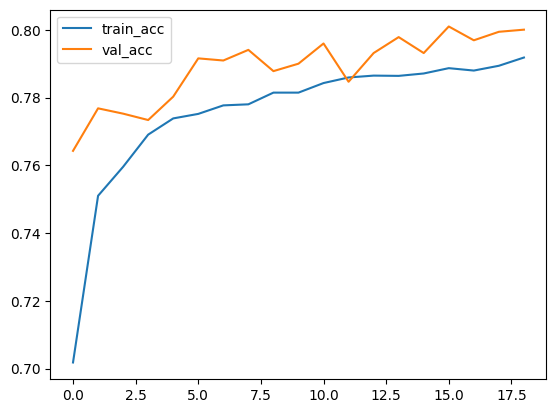

In [59]:
plt.plot(history.history['accuracy'],label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

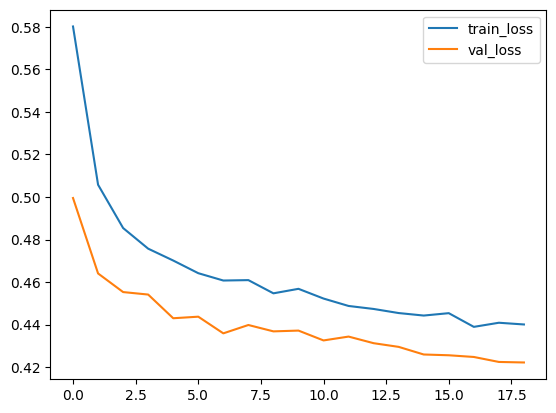

In [60]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

In [68]:
pickle.dump(Le_gender,open('gender_encoder.pkl','wb'))
pickle.dump(Le_country,open('country_encoder.pkl','wb'))